# Анализ оттока клиентов банка

## Описание проекта

### Цель проекта:

Проанализировать клиентов Банка и выделить сегменты клиентов, которые склонны уходить из банка. Определить рекомендации для удержания клиентов Банка, склонных ухдить в отток. По итогу исследования подготовить презентацию.


### Задача:

Определить усредненный портрет клиента Банка, который с большей вероятностью уйдет из Банка.

### План проекта:

**1. Загрузка и обзор данных**

**2. Предобработка данных**

2.1. Проверка данных на пропуски.

2.2. Проверка данных на дубликаты.

2.3. Проверка данных на реальность.

2.4. Категоризация клиентов по возрасту, уровню кредитного рейтинга и размеру баланса.

2.5. Выделение отдельного столбца, в котором будет отражатся принадлежность к полу в виде числового значения 0 или 1.

2.6. Выделение отдельного столбца, в котором будет отражатся географический признак клиента (город) в виде числового значения 0 или 1.

**3. Исследовательский анализ**

3.1. Изучение основных параметров. Распределение клиентов по гродам присутствия Банка, по полу, возрасту и уровню дохода.

3.2. Оценка общего уровня благосостояния клиентов.

3.3. Анализ вовлеченности клиентов. Насколько клиенты заинтересованы продуктами Банка. Распределение среднего остатка по счетам, количества действующих продуктов, есть ли кредитная карта.

3.4. Матрица корреляции.

3.5. Исследование активных клиентов по столбцу 'Loyalty'.


**4. Усредненный портрет клиента Банка, попавшего в отток, и лояльного клиента**

**5. Статистическая проверка гипотез**

5.1. Определение критерия статистической проверки и его обоснование.

5.2. Проверка гипотезы различия дохода между теми клиентами, которые ушли и теми, которые остались.

5.3. Проверка гипотезы о влиянии возраста на отток клиентов. 

**6. Основные выводы и рекомендации. Ссылка на презентацию**

### План презентации
1. Описание целей и задач исследования
2. Краткое описание полученных результатов исследования
3. Общая информация о клиентах Банка (количество клиентов, остатки на счетах, кол-во кредитных карт, средний кредитный рейтинг, количество имеющихся банковских продуктов)
4. Усредненный портрет активного клиента
5. Усредненный портрет клиента Банка, который с большей вероятностью уйдет в отток.
6. Усредненный портрет лояльного клиента, который продолжит пользоваться продуктами Банка.
7. Результаты проверки стат.гипотез
8. Выводы и рекомендации


### Описание датасетов

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.


## Обзор данных

In [1]:
#Импортируем библиотеки. 
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
import warnings
warnings.filterwarnings('ignore')
from scipy import stats as st
import statsmodels.api as sm

In [2]:
#Считаем данные из csv-файла в датафрейм и сохраняем в переменную data.
try:
    data = pd.read_csv('/datasets/bank_dataset.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_dataset.csv')

In [3]:
#функция для показа значений барплот
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.0f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.0f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

In [4]:
#выгружаем первые 5 строк датафрейма
data.head()

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [6]:
data.describe()

,userid,score,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.560844e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.567126e+07,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.573347e+07,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.579597e+07,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.585843e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Вывод:**
1. Исследуемый датафрейм содержит 12 столбцов с данными базы клиентов регионального банка. 
2. В таблице содержится 10 000 строк с информацией о клиентах Банка.

## Предобработка данных

Проведем предобработку данных. Для начала переведем название столбцов в нижний регистр.

In [7]:
#перевод названия столбцов в нижний регистр
data.columns = data.columns.str.lower()
#проверяем корректную замену названий столбцов
data.columns


Index(['userid', 'score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'creditcard', 'loyalty', 'estimated_salary', 'churn'],
      dtype='object')

In [8]:
#посмотрим сколько пропусков содержится в данных
data.isna().sum()

userid                 0
score                  0
city                   0
gender                 0
age                    0
objects                0
balance             3617
products               0
creditcard             0
loyalty                0
estimated_salary       0
churn                  0
dtype: int64

Датафрейм содержит пропуски в столбце balance, в количестве 3 617 строк.

In [9]:
print(data['balance'].isna().sum()/data.shape[0]*100, '% данных пропущено в столбце "balance"')

36.17 % данных пропущено в столбце "balance"


Определим возможные причины возникновения пропусков:
1. Пропущенные значения равны 0
2. Значения пропущены у ушедших клиентов
3. У клиента есть только кредитная карта, а дебетова карта отсутствует. Отрицательный баланс с кредитной карты не подгружается.

Проверим данные гипотезы на данных. Посмотрим распределение баланса на счетах клиентов

Посмотрим распределение баланса 

In [10]:
data['balance'].describe()

count      6383.000000
mean     119827.493793
std       30095.056462
min        3768.690000
25%      100181.975000
50%      119839.690000
75%      139512.290000
max      250898.090000
Name: balance, dtype: float64

Нулевого и отрицательного баланса в представленных данных нет. 

In [11]:
#выведим количество пропущенных значений баланса для оставшихся и ушедших клиентов
df_stay = data.query('churn == 0')
df_churn = data.query('churn == 1')

print('Количество пропущенных значений остатка баланса для ушедших клиентов', df_churn['balance'].isna().sum())
print('Количество пропущенных значений остатка баланса для оставшихся клиентов', df_stay['balance'].isna().sum())

Количество пропущенных значений остатка баланса для ушедших клиентов 500
Количество пропущенных значений остатка баланса для оставшихся клиентов 3117


In [12]:
#выведим количество пропущенных значений баланса для клиентов имеющих/неимеющих кредитную карту
df_credit = data.query('creditcard == 1')
df_nocredit = data.query('creditcard == 0')

print('Количество пропущенных значений остатка баланса для клиентов с кредитной картой', df_credit['balance'].isna().sum())
print('Количество пропущенных значений остатка баланса для клиентов без кредитной карты', df_nocredit['balance'].isna().sum())

Количество пропущенных значений остатка баланса для клиентов с кредитной картой 2592
Количество пропущенных значений остатка баланса для клиентов без кредитной карты 1025


In [13]:
df_stay_without_credit = df_stay.query('creditcard == 0')
print('Количество пропущенных значений остатка для оставшихся клиентов без кредитки', df_stay_without_credit['balance'].isna().sum())

Количество пропущенных значений остатка для оставшихся клиентов без кредитки 877


Таким образом можно считать, что данные в столбце 'balance' отражают остатки по дебетовым картам. У оставшихся 877 клиентов без кредитной карты, могут быть открыты вкладные счета и отсутсвовать дебедовая карта. Так же у этих клиентов на карте может быть нулевой баланс. Поскольку, странно, что из 10 000 клиентов ни у одного из них нет нулевого остатка на счете.

Считаем необходимым проработать вопрос корректного отражения данных с разработчиками.

Некорректно заменять на 0 пропуски в данных ушедших клиентов и клиентов с кредитной картой, поскольку это может исказить результаты исследования. 

Заменим на 0 балансы оставшихся клиентов без кредитки, их 877 строк.

In [14]:
#заменяем NaN на 0 баланс в таблице df_stay_without_credit
df_stay_without_credit['balance'] = df_stay_without_credit['balance'].fillna(0)
#заменяем значения NaN в основном датафрейме на данные из таблицы df_stay_without_credit
data = data.set_index('userid').combine_first(df_stay_without_credit.set_index('userid')).reset_index()
#Проверяем кол-во пропусков
print('Осталось пропусков:', data['balance'].isna().sum())

Осталось пропусков: 2740


Проверим имеются ли дубликаты значений по столбцу 'userid'

In [15]:
data['userid'].value_counts().reset_index().query('userid > 1')

,index,userid


Дубликатов 'userid' не найдено

Посмотрим все ункальные значения городов и пола, Проверим на неявные дубликаты.

In [16]:
data['city'].sort_values().unique()

array(['Ростов Великий', 'Рыбинск', 'Ярославль'], dtype=object)

In [17]:
data['gender'].sort_values().unique()

array(['Ж', 'М'], dtype=object)

Неявных дубликатов или ошибочных значений в поле город и пол нет.

Посмотрим на разброс значений столбцов 'score', 'age', 'objects', 'balance',
       'products', 'estimated_salary', оценим их реальность

In [18]:
data[['score', 'age', 'objects', 'balance',
       'products', 'estimated_salary']].describe()

,score,age,objects,balance,products,estimated_salary
count,10000.000000,10000.000000,10000.000000,7260.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,105352.464584,1.530200,100090.239881
std,96.653299,10.487806,2.892174,48181.722384,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,88932.927500,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,114629.815000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,136503.587500,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


Обнаружены аномальные значения в столбце 'estimated_salary'. Миниммальный указанный доход равен 11.58. 

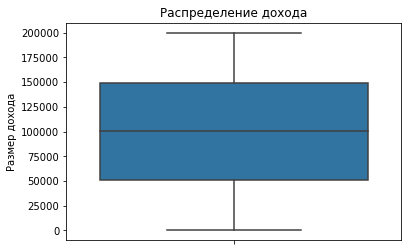

In [19]:
sns.boxplot(y=data['estimated_salary'])
plt.title('Распределение дохода')
plt.ylabel('Размер дохода')
plt.show()

В 2022 году МРОТ составлял 15 279 рублей. 

In [20]:
print('Количество клиентов с доход ниже МРОТ:', data.query('estimated_salary <= 15279').shape[0])

Количество клиентов с доход ниже МРОТ: 761


In [21]:
print('Количество клиентов с доходом ниже половины от МРОТ:', data.query('estimated_salary <= 15279/2').shape[0])

Количество клиентов с доходом ниже половины от МРОТ: 382


Нереалистичные размеры дохода могут быть обусловлены техническй ошибкой при вводе данных о доходах в анкету. Либо, если клиент находится на зарплатном проекте, подгружены с последнего поступления на счет от работодателя (это может быть аванс или расчет по больничному листу).

Поскольку точный доход установить не представляется возможным, и на основании вышеизложенного, осуществлять категоризацию по признаку дохода не будем. В дальнейщем в исследовании считаем целесообразным опираться только на медианный доход клиентов. 

In [22]:
#Проверяем датасет на полные дубликты строк
print('Количество полных дубликатов строк', data.duplicated().sum())

Количество полных дубликатов строк 0


Категоризация клиентов по возрасту, уровню кредитного рейтинга и размеру баланса.

In [23]:
#напишем функцию, которая распределит возраст по категориям
def age_category(data):
    if data['age'] <= 25:
        return '18-25 лет'
    elif data['age'] <= 45:
        return '26-45 лет'
    elif data['age'] <= 55:
        return '46-55 лет'
    else:
        return '56 лет и старше'

#добавим новый столбец в таблицу
data['age_category'] = data.apply(age_category, axis=1)
data.head(5)

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,age_category
0,15608437,698,Рыбинск,Ж,39,9,161993.89,1,0,0,90212.38,0,26-45 лет
1,15608442,612,Рыбинск,М,35,1,NaN,1,1,1,83256.26,1,26-45 лет
2,15608450,601,Ярославль,М,47,1,64430.06,2,0,1,96517.97,0,46-55 лет
3,15608515,627,Ростов Великий,Ж,30,6,57809.32,1,1,0,188258.49,0,26-45 лет
4,15608532,745,Ростов Великий,М,48,10,96048.55,1,1,0,74510.65,0,46-55 лет


In [24]:
#напишем функцию, которая распределит баланс на счету по категориям
def balance_category(data):
    if data['balance'] <= 10000:
        return 'менее 10000 руб'
    elif data['balance'] <= 50000:
        return '10001 - 50000 руб'
    elif data['balance'] <= 100000:
        return '50001 - 100000 руб'
    else:
        return 'более 100001 руб'

#добавим новый столбец в таблицу
data['balance_category'] = data.apply(balance_category, axis=1)
data.head()

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,age_category,balance_category
0,15608437,698,Рыбинск,Ж,39,9,161993.89,1,0,0,90212.38,0,26-45 лет,более 100001 руб
1,15608442,612,Рыбинск,М,35,1,NaN,1,1,1,83256.26,1,26-45 лет,более 100001 руб
2,15608450,601,Ярославль,М,47,1,64430.06,2,0,1,96517.97,0,46-55 лет,50001 - 100000 руб
3,15608515,627,Ростов Великий,Ж,30,6,57809.32,1,1,0,188258.49,0,26-45 лет,50001 - 100000 руб
4,15608532,745,Ростов Великий,М,48,10,96048.55,1,1,0,74510.65,0,46-55 лет,50001 - 100000 руб


In [25]:
#напишем функцию, которая распределит уровень кредитного рейтинга по категориям
def score_category(data):
    if data['score'] <= 500:
        return 'низкий уровень'
    elif 500 < data['score'] <= 600:
        return 'ниже среднего'
    elif 600 < data['score'] <= 650:
        return 'средний'
    elif 650 < data['score'] <= 690:
        return 'выше среднего'
    else:
        return 'высокий уровень'

    #добавим новый столбец в таблицу
data['score_category'] = data.apply(score_category, axis=1)
data.head()

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,age_category,balance_category,score_category
0,15608437,698,Рыбинск,Ж,39,9,161993.89,1,0,0,90212.38,0,26-45 лет,более 100001 руб,высокий уровень
1,15608442,612,Рыбинск,М,35,1,NaN,1,1,1,83256.26,1,26-45 лет,более 100001 руб,средний
2,15608450,601,Ярославль,М,47,1,64430.06,2,0,1,96517.97,0,46-55 лет,50001 - 100000 руб,средний
3,15608515,627,Ростов Великий,Ж,30,6,57809.32,1,1,0,188258.49,0,26-45 лет,50001 - 100000 руб,средний
4,15608532,745,Ростов Великий,М,48,10,96048.55,1,1,0,74510.65,0,46-55 лет,50001 - 100000 руб,высокий уровень


2.5. Выделение отдельного столбца, в котором будет отражатся принадлежность к полу в виде числового признака 0 или 1.

In [26]:
data['male_female'] = data['gender']

data = pd.get_dummies(data, columns=['gender'], drop_first= True)
data.head()

,userid,score,city,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,age_category,balance_category,score_category,male_female,gender_М
0,15608437,698,Рыбинск,39,9,161993.89,1,0,0,90212.38,0,26-45 лет,более 100001 руб,высокий уровень,Ж,0
1,15608442,612,Рыбинск,35,1,NaN,1,1,1,83256.26,1,26-45 лет,более 100001 руб,средний,М,1
2,15608450,601,Ярославль,47,1,64430.06,2,0,1,96517.97,0,46-55 лет,50001 - 100000 руб,средний,М,1
3,15608515,627,Ростов Великий,30,6,57809.32,1,1,0,188258.49,0,26-45 лет,50001 - 100000 руб,средний,Ж,0
4,15608532,745,Ростов Великий,48,10,96048.55,1,1,0,74510.65,0,46-55 лет,50001 - 100000 руб,высокий уровень,М,1


2.6. Выделение отдельного столбца, в котором будет отражатся географический признак клиента (город) в виде числового признака 0 или 1.

In [27]:
data['city_category'] = data['city']

data = pd.get_dummies(data, columns=['city_category'], drop_first= True)
data.head()

,userid,score,city,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,age_category,balance_category,score_category,male_female,gender_М,city_category_Рыбинск,city_category_Ярославль
0,15608437,698,Рыбинск,39,9,161993.89,1,0,0,90212.38,0,26-45 лет,более 100001 руб,высокий уровень,Ж,0,1,0
1,15608442,612,Рыбинск,35,1,NaN,1,1,1,83256.26,1,26-45 лет,более 100001 руб,средний,М,1,1,0
2,15608450,601,Ярославль,47,1,64430.06,2,0,1,96517.97,0,46-55 лет,50001 - 100000 руб,средний,М,1,0,1
3,15608515,627,Ростов Великий,30,6,57809.32,1,1,0,188258.49,0,26-45 лет,50001 - 100000 руб,средний,Ж,0,0,0
4,15608532,745,Ростов Великий,48,10,96048.55,1,1,0,74510.65,0,46-55 лет,50001 - 100000 руб,высокий уровень,М,1,0,0


In [28]:

def city_category(data):
    if data['city'] == 'Ростов Великий':
        return 1
    else:
        return 0

    #добавим новый столбец в таблицу
data['city_category_Ростов'] = data.apply(city_category, axis=1)
data.head()

,userid,score,city,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,age_category,balance_category,score_category,male_female,gender_М,city_category_Рыбинск,city_category_Ярославль,city_category_Ростов
0,15608437,698,Рыбинск,39,9,161993.89,1,0,0,90212.38,0,26-45 лет,более 100001 руб,высокий уровень,Ж,0,1,0,0
1,15608442,612,Рыбинск,35,1,NaN,1,1,1,83256.26,1,26-45 лет,более 100001 руб,средний,М,1,1,0,0
2,15608450,601,Ярославль,47,1,64430.06,2,0,1,96517.97,0,46-55 лет,50001 - 100000 руб,средний,М,1,0,1,0
3,15608515,627,Ростов Великий,30,6,57809.32,1,1,0,188258.49,0,26-45 лет,50001 - 100000 руб,средний,Ж,0,0,0,1
4,15608532,745,Ростов Великий,48,10,96048.55,1,1,0,74510.65,0,46-55 лет,50001 - 100000 руб,высокий уровень,М,1,0,0,1


**Вывод:**
1. Датафрейм содержит пропуски в столбце balance, в количестве 3 617 строк (36.17 %). 
Мы выяснили, что данные в столбце 'balance' отражают остатки по дебетовым картам. 
Пропущены значения у ушедших клиентов, клиентов с кредитной картой (отрицательный баланс по кредитной карте не подгружается), клиентов, у которых отсутсвует дебетовая карта, и клиентов с нулевым балансом.
Считаем цулесообразным проработать вопрос корректного отражения данных с разработчиками.
2. Дубликатов данных не наблюдается. Все 10 000 клиентов являются уникальными.
3. Проведена категоризация клиентов по возрасту, уровню кредитного рейтинга и размеру баланса.


## Исследовательский анализ данных

### Изучение основных параметров

Посмотрим как распределены клиенты по городам присутствия Банка

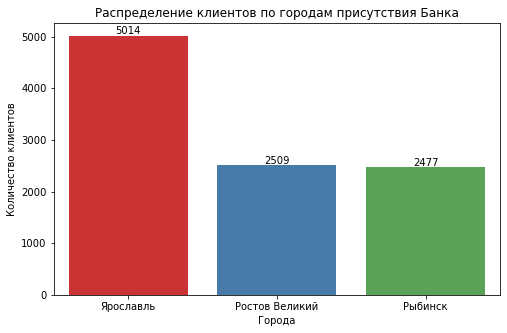

In [29]:
#визуальное представление распределения клиентов по городам присутствия Банка
plt.figure(figsize=(8, 5))
p = sns.barplot(x='index', y='city', data=data['city'].value_counts().reset_index(), palette='Set1')
show_values(p, "v", space=0)       
plt.title('Распределение клиентов по городам присутствия Банка')
plt.xlabel('Города')
plt.ylabel('Количество клиентов')
plt.show()


<div class="alert alert-block alert-warning">
<b> ⚠️ Комментарий ревьюера:</b> Попробуй использовать пирожковую диаграмму как и в случае ниже
</div>

Большая часть клиентов обслуживается в головном офисе Банка в городе Ярославле. В областных городах находится примерно столько же клиентов и они разделены практически поровну.

Распределение клиентов по полу, возрасту и уровню дохода.

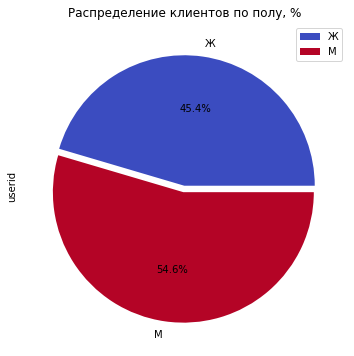

In [30]:
#визуальное представление распределения клиентов по полу
plt.figure(figsize=(8, 6))
gender = data.groupby('male_female')['userid'].count()
#gender.reset_index()
gender.plot(kind='pie', autopct='%1.1f%%', cmap='coolwarm', legend = True, explode =(0,0.05))
plt.title('Распределение клиентов по полу, %')
plt.show()

Клиентов - мужчин на 10 % больше

Посмотрим как распределены клиенты по возрастым группам

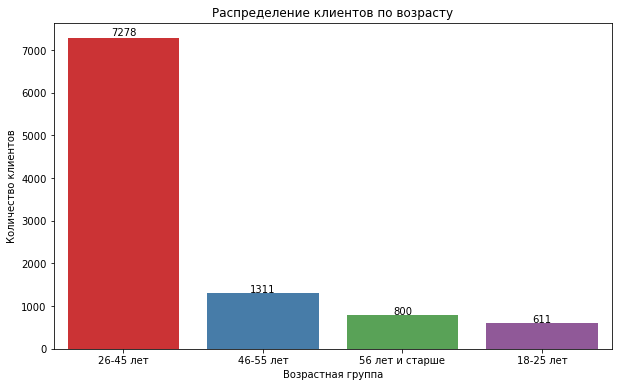

In [31]:
#визуальное представление распределения клиентов по возрасту
plt.figure(figsize=(10, 6))
p = sns.barplot(x='index', y='age_category', data=data['age_category'].value_counts().reset_index(), palette='Set1')
show_values(p, "v", space=0)       
plt.title('Распределение клиентов по возрасту')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество клиентов')
plt.show()

Больше всего клиентов среднего возраста 26-45 лет. Меньше всего клиентов младшей возрастной группы 18-25 лет.

Посмотрим на распределение клиентов по возрасту и полу

In [32]:
male = data.query('male_female == "М"').groupby('age_category')['userid'].count()
female = data.query('male_female == "Ж"').groupby('age_category')['userid'].count()

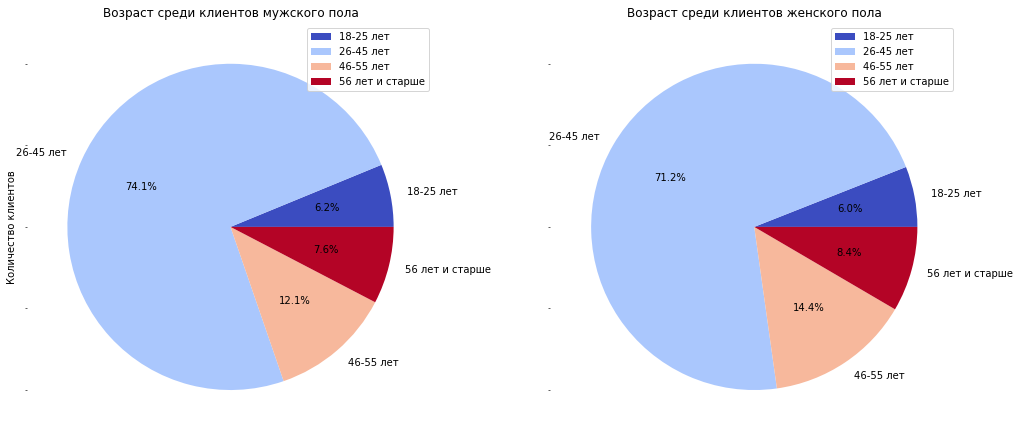

In [33]:
plt.figure(figsize=(15, 12))

ax1 = plt.subplot(2, 2, 1)
male.plot(kind='pie', autopct='%1.1f%%', cmap='coolwarm', legend = True)
plt.legend()
plt.ylabel('Количество клиентов')
plt.title('Возраст среди клиентов мужского пола')

ax2 = plt.subplot(2, 2, 2, sharey = ax1)
female.plot(kind='pie', autopct='%1.1f%%', cmap='coolwarm', legend = True)
plt.legend()
plt.title('Возраст среди клиентов женского пола')
plt.tight_layout()
plt.show()

 Большая часть клиентов банка нахдится в возрасте 26-45 лет. Распределение мужчин и женщин по возрастным группам в целом сопоставимо.

 ### Оценка общего уровеня благостостояния клиентов Банка

Посмотрим как респределен доход в зависимости от возраста клиента, его пола наличия кредитной карты.

In [34]:
salary = data[['age_category', 'male_female', 'creditcard']].copy()

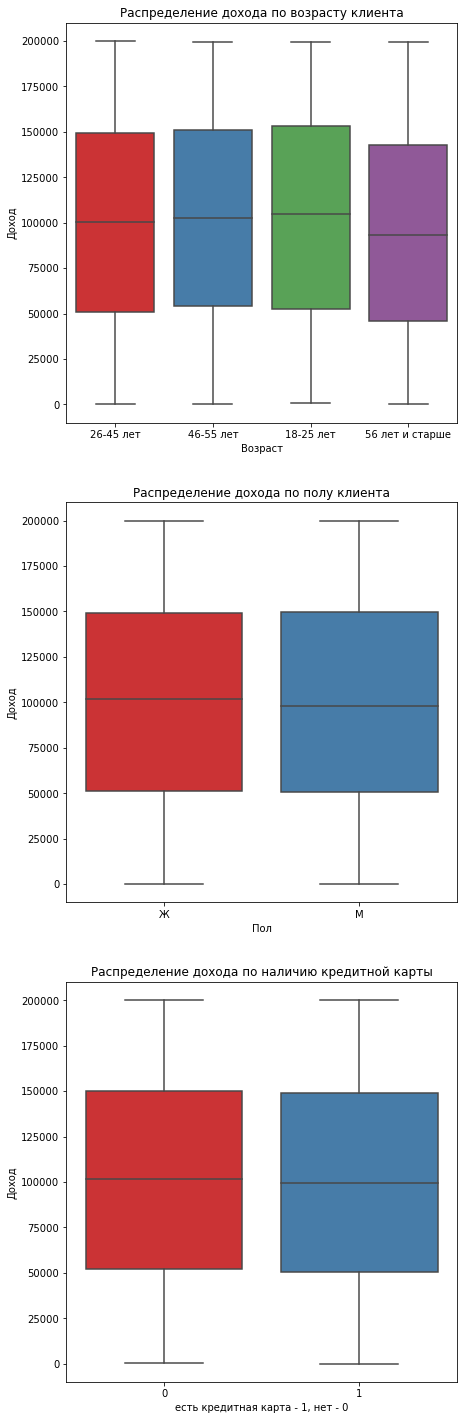

In [35]:
fig, ax = plt.subplots(3, 1, figsize=(7, 25)) #создаем фигуру 'fig' размером 7х25 дюймов
#в ней будет 3 ряда из (графиков) 'ах'
                                                                                          
for num, col in enumerate(salary):          #отрисовываем в цикле, даем название
    sns.boxplot(data = data, x = col, y='estimated_salary', ax = ax[num], palette='Set1')
    title = ['Распределение дохода по возрасту клиента', 'Распределение дохода по полу клиента', 'Распределение дохода по наличию кредитной карты']
    xlabel = ['Возраст', 'Пол', 'есть кредитная карта - 1, нет - 0']
    ax[num].set_ylabel('Доход')
    for num, t in enumerate(title):
        ax[num].set_title(t)   
    for num, x in enumerate(xlabel):
        ax[num].set_xlabel(x)


Интересно, что доход клиентов возраста 18-25 лет в целом немного выше других групп. Самый низкий доход у клиентов предпенсионного и пенсионного возраста, что в целом ожидаемо.

In [36]:
objects = data['objects'].value_counts()
balance = data['balance_category'].value_counts()

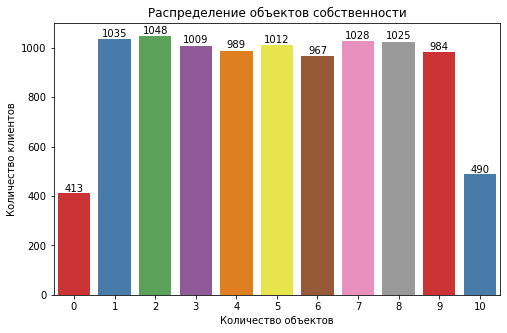

In [37]:
#визуальное представление распределения клиентов по городам присутствия Банка
plt.figure(figsize=(8, 5))
p = sns.barplot(x='index', y='objects', data=data['objects'].value_counts().reset_index(), palette='Set1')
show_values(p, "v", space=0)       
plt.title('Распределение объектов собственности')
plt.xlabel('Количество объектов')
plt.ylabel('Количество клиентов')
plt.show()


Довольно неожиданно, что у большего числа клиентов в выборке в собственности более 5 объектов.

### Анализ вовлеченности клиентов

Определим насколько клиенты заинтересованы продуктами Банка.

In [38]:
involvement = data[['products', 'balance_category', 'creditcard']].copy()

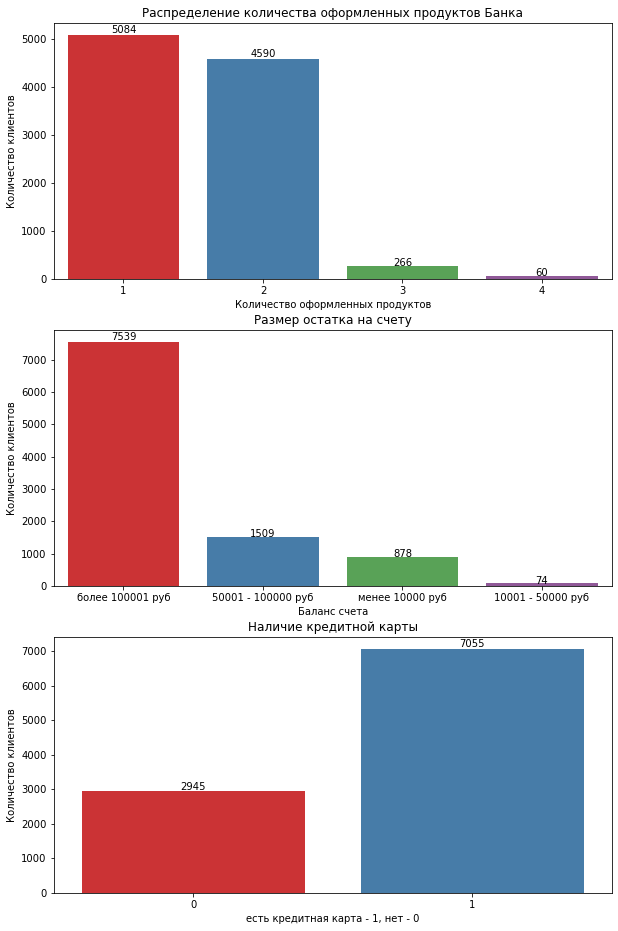

In [39]:
fig, ax = plt.subplots(3, 1, figsize=(10, 16)) #создаем фигуру 'fig' размером 10х6 дюймов
#в ней будет 3 ряда из (графиков) 'ах'
                                                                                          
for num, col in enumerate(involvement):          #отрисовываем в цикле, даем название
    p = sns.countplot(data = data, x = col, ax = ax[num], palette='Set1')    
    show_values(p, "v", space=0)
    title = ['Распределение количества оформленных продуктов Банка', 'Размер остатка на счету', 'Наличие кредитной карты']
    xlabel = ['Количество оформленных продуктов', 'Баланс счета', 'есть кредитная карта - 1, нет - 0']
    ylabel = ['Количество клиентов', 'Количество клиентов', 'Количество клиентов']
    for num, t in enumerate(title):
        ax[num].set_title(t)   
    for num, x in enumerate(xlabel):
        ax[num].set_xlabel(x)
    for num, y in enumerate(ylabel):
        ax[num].set_ylabel(y)   
    

У большего числа клиентов оформлено 1 или 2 продукта

Остаток на счете более 100 000 рублей

Есть кредитная карта.

### Матрица корреляции.

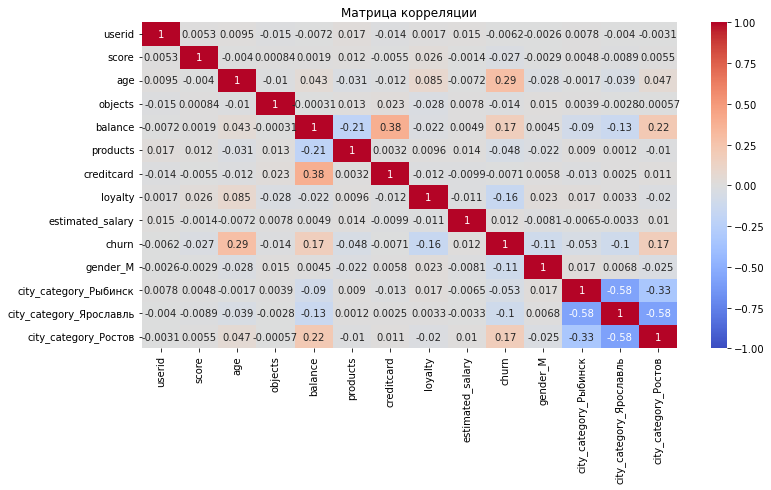

In [40]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot = True, cmap='coolwarm', vmin=-1, vmax=1, center= 0)
plt.title('Матрица корреляции')
plt.show()

В целом высокая и средняя корреляция не выявлена.

Корреляция ниже среднего (0,38) выявлена между категориями кредитная карта - баланс. 

Корреляция ниже среднего (0,29) выявлена между категориями кредитная отток - возраст. 

Корреляция ниже среднего (0,22) выявлена между категориями баланс - город Ростов Великий.


### Исследование активных клиентов по столбцу 'loyalty'

Определим среди активных клиентов больше мужчин или женщин, какие города обслуживания предпочитают, уровень дохода, количество продуктов, баланс по счету, есть ли кредитные карты.

In [41]:
#определим столбцы для построения графиков
loyalty_data = data[[
    'score_category', 'city', 'objects', 'products', 'balance_category', 
    'creditcard', 'age_category', 'male_female'
]].copy()

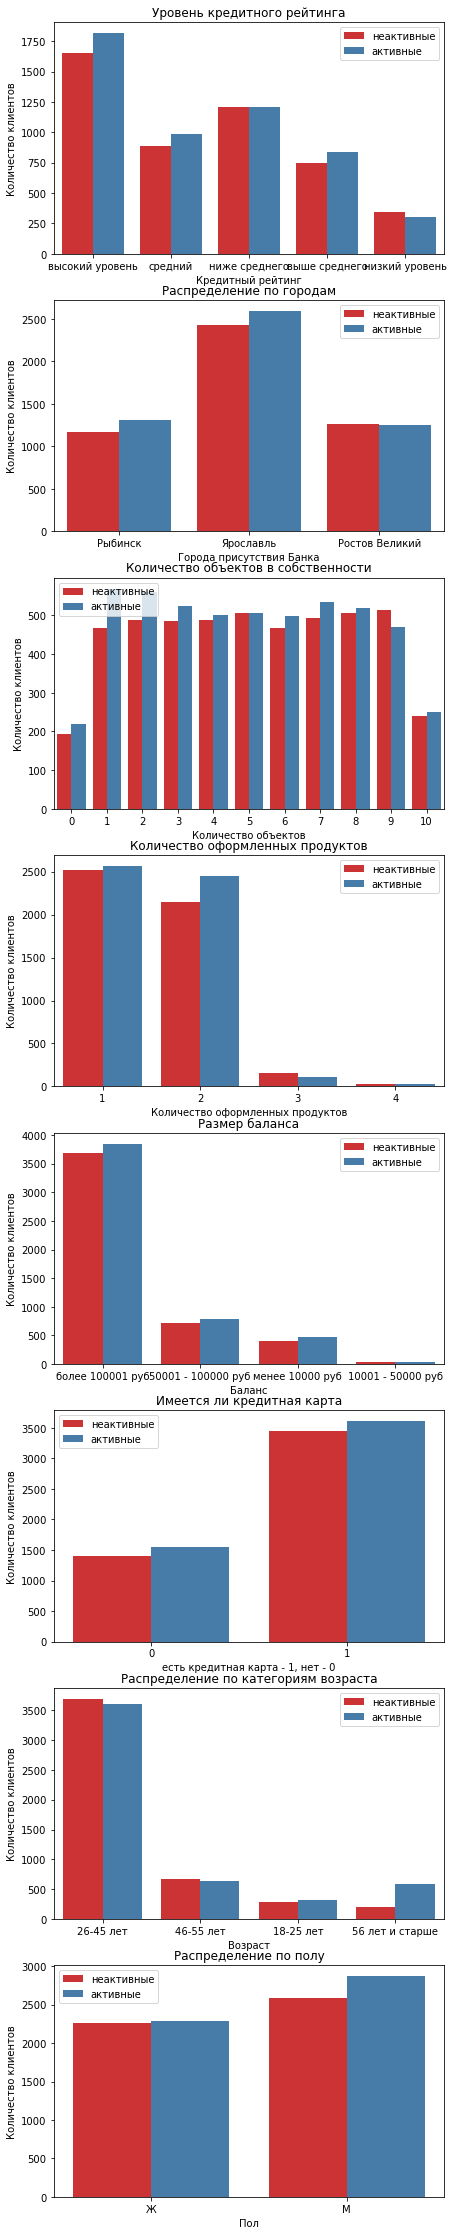

In [42]:
fig, ax = plt.subplots(8, 1, figsize=(7, 40))   #сделаем 8 рядов по 1 графику, чтобы они не мешали друг другу 
   
for num, col in enumerate(loyalty_data):          #отрисовываем в цикле, даем название
    sns.countplot(data = data, x = col, ax = ax[num], hue='loyalty', palette='Set1') 
    ax[num].legend(['неактивные', 'активные'])
    ax[num].set_ylabel('Количество клиентов')
    title = ['Уровень кредитного рейтинга', 'Распределение по городам', 'Количество объектов в собственности', 'Количество оформленных продуктов', 'Размер баланса', 'Имеется ли кредитная карта', 'Распределение по категориям возраста', 'Распределение по полу']
    xlabel = ['Кредитный рейтинг', 'Города присутствия Банка', 'Количество объектов', 'Количество оформленных продуктов', 'Баланс', 'есть кредитная карта - 1, нет - 0', 'Возраст', 'Пол']
    
    for num, t in enumerate(title):
        ax[num].set_title(t)   
    for num, x in enumerate(xlabel):
        ax[num].set_xlabel(x)
    

Больше всего встречается клиентов со средним кредитным рейтингом. Уровень кредитного рейтинга у активных клиентов немного выше, чем не активных. Искючение составляют клиент с низким скор-баллом.

Доля активных клиентов в Ярославле и Рыбинске больше. В Ростове Великом активость клиентов одинаковая.

Активных клиентов имеющих 2 банковских продукта больше, чем неактивных. При этом доля неактивных клиентов с 3-мя продуктами больше.

Больше всего активных клиентов в группе 26-45 лет. При этом в этой группе активность/неактивность клиентов примерно одинаковая. Интересно, что в возрастной группе 56 лет и старше доля активных клиентов больше, чем неактивных.

Активный клиент скорее всего мужчина в возрасте 26-45 лет, обслуживается в Ярославле или Рыбинске. Имеет средний кредитный рейтинг, оформил 1 - 2 банковских продукта, один из которых кредитная карта. Остаток баланса у токо клиента как правило более 100 000 рублей,  и 1 или 2 объекта в собственности.

**Вывод:**

1. Большая часть клиентов обслуживается в головном офисе Банка в городе Ярославле. В областных городах находится примерно столько же клиентов и они разделены практически поровну.
2. Клиентов - мужчин на 10 % больше, чем клиентов-женщин.
3. Больше всего клиентов среднего возраста 26-45 лет. Меньше всего клиентов младшей возрастной группы 18-25 лет. Среди почти всех возрастных групп мужчин больше. Отличается только катеория 46-55 лет, де женщин и мужчин поровну.
4. Доход клиентов возраста 18-25 лет в целом немного выше других групп. Самый низкий доход у клиентов предпенсионного и пенсионного возраста, что в целом ожидаемо. У большего числа клиентов в выборке в собственности более 5 объектов.
5. У типичного клиента Банка оформлено 1 или 2 продукта, остаток на счете более 100 000 рублей, есть кредитная карта, имеет  высокий кредитный рейтинг. 
6. Портрет активного клиента: Мужчина, в возрасте 26-45 лет, обслуживается в Ярославле и Рыбинске. Имеет 1-2 банковских продукта, кредитную карту, имеет высокий кредитный рейтинг. Остаток баланса у такого клиента как правило более 100 000 рублей


## Усредненный портрет клиента Банка, попавшего в отток и лояльного клиента.

Определим долю ушедших клиентов от общего числа

In [43]:
print(
    'Доля клиентов попавших в отток', 
    round((data[data['churn'] == 1]['userid'].count()/data['userid'].count()*100), 2), '%'
)

Доля клиентов попавших в отток 20.37 %


Определим долю оттока по возрастным группам. 

In [44]:
#Посчитаем кол-во клиентов попавших в отток по группам возраста
churn_age = data.query('churn==1').pivot_table(
    index='age_category', 
    values=['userid'], aggfunc='count'
)
#переименуем столбец
churn_age.rename(columns = {'userid':'cnt_churn'}, inplace = True )
#добавим столбец с ко-вом всех клиентов по группам возраста
churn_age['all_users'] = data.groupby('age_category')['userid'].count()
#посчитаем процент клиентов оттока
churn_age['persent_churn'] = round(churn_age['cnt_churn']/churn_age['all_users']*100, 2)
churn_age.reset_index()

,age_category,cnt_churn,all_users,persent_churn
0,18-25 лет,46,611,7.53
1,26-45 лет,1034,7278,14.21
2,46-55 лет,663,1311,50.57
3,56 лет и старше,294,800,36.75


Меньше всего в отток уходят клиенты возрастной категории 18-25 лет (7.53 %). Клиенты среднего возраста (46-55 лет) ухдят в отток в половине случаев.

Визуализируем плотность распределения клиентов попавших в отток и оставшихся по возрасту

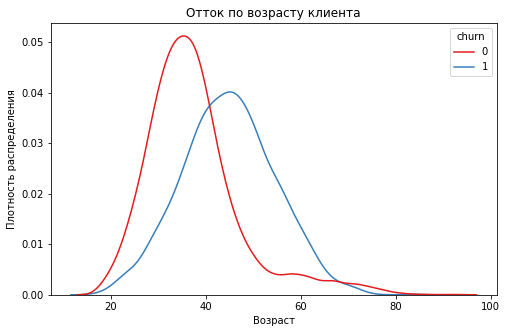

In [45]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=data, x="age", hue="churn", palette='Set1', common_norm=False)
plt.title('Отток по возрасту клиента')
plt.xlabel('Возраст')
plt.ylabel('Плотность распределения')
plt.show()

Клиенты в возрасте 45-70 лет чаще уходят в отток, чем остаются.

Пик отока наблюдается в возрасте 45-50 лет.

Определим долю оттока по полу и городам присутствия Банка

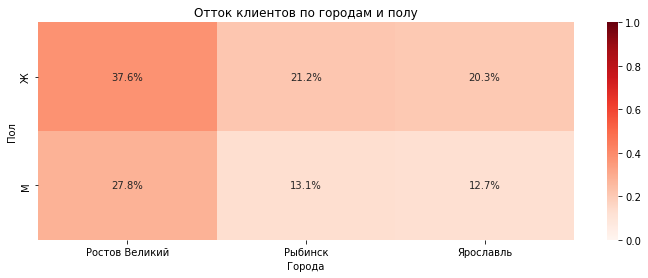

In [46]:
cities_gender = data.pivot_table(
        index='male_female',
        columns='city',
        values='churn',
        aggfunc='mean'
    )
plt.figure(figsize=(12, 4))
sns.heatmap(cities_gender, annot=True, cmap='Reds', vmin=0, vmax=1, fmt='.1%')
plt.title('Отток клиентов по городам и полу')
plt.xlabel('Города')
plt.ylabel('Пол')
plt.show()

В отток склоны уходить женщины из Ростова Великого (37,6 % всех клиентов). Мужчины из Рыбинска и Ярославля более лояльны (в отток уходят чуть более 10% клиентов-мужчин). В целом женщины более склоны уходить, чем оставаться. Отток из Ростова Великого более выражен.

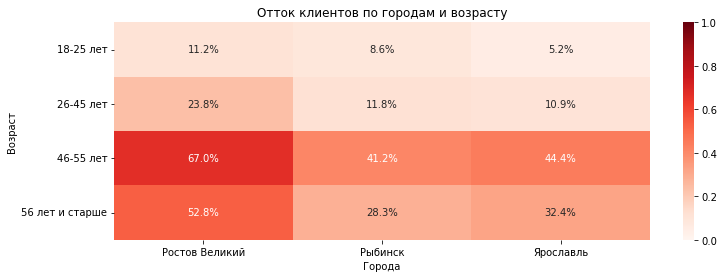

In [47]:
cities_age = data.pivot_table(
        index='age_category',
        columns='city',
        values='churn',
        aggfunc='mean'
    )
plt.figure(figsize=(12, 4))
sns.heatmap(cities_age, annot=True, cmap='Reds', vmin=0, vmax=1, fmt='.1%')
plt.title('Отток клиентов по городам и возрасту')
plt.xlabel('Города')
plt.ylabel('Возраст')
plt.show()

В целом клиенты возрастной категории 46-55 лет более склоны уходить, чем оставаться. Отток из Ростова Великого более выражен. Максимальный отток наблюдается среди клиентов 46-55 лет из Ростова Великого.

Клиенты молодого возраста более лояльны. Максимально лояльны клиенты из Ярославля в возрасте 18-25 лет.

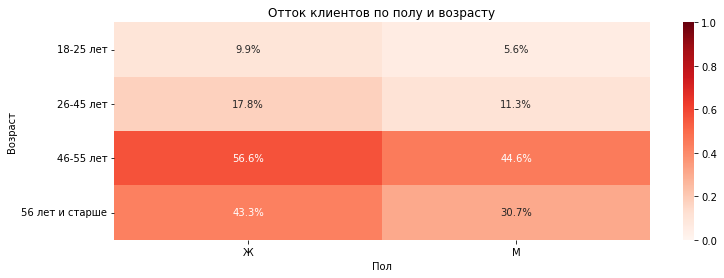

In [48]:
gender_age = data.pivot_table(
        index='age_category',
        columns='male_female',
        values='churn',
        aggfunc='mean'
    )
plt.figure(figsize=(12, 4))
sns.heatmap(gender_age, annot=True, cmap='Reds', vmin=0, vmax=1, fmt='.1%')
plt.title('Отток клиентов по полу и возрасту')
plt.xlabel('Пол')
plt.ylabel('Возраст')
plt.show()

Женщины менее лояльны к Банку, чем мужчины. 

Визуализируем плотность распределения клиентов попавших в отток и оставшихся по количественный переменным

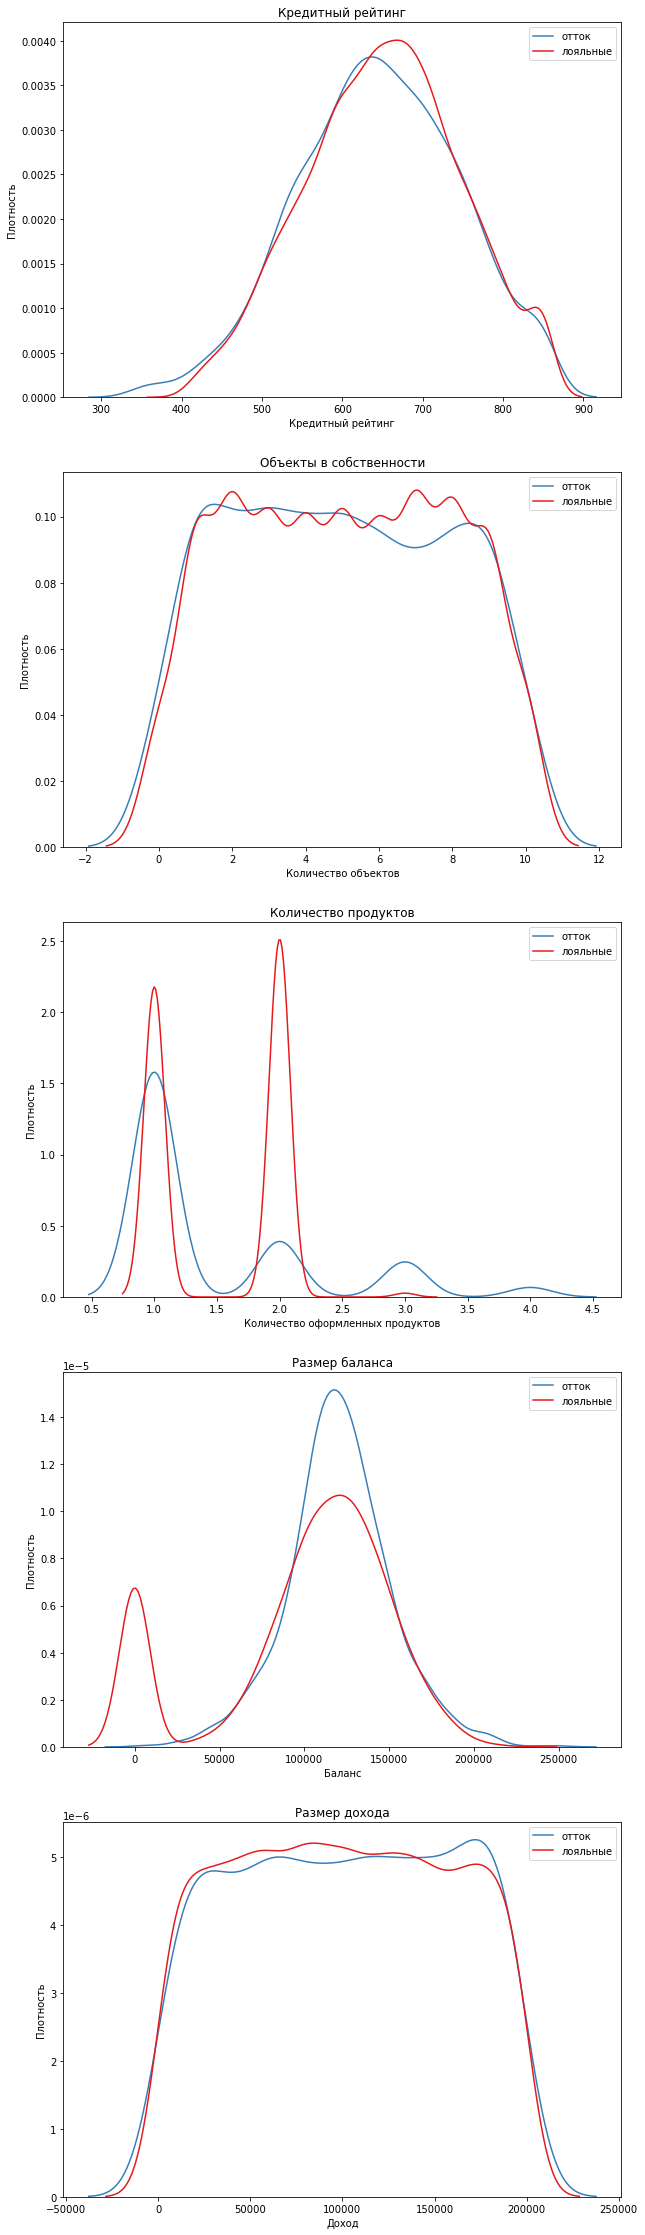

In [49]:
loyalty_data = data[[
    'score', 'objects', 'products', 'balance', 'estimated_salary',
]].copy()

fig, ax = plt.subplots(5, 1, figsize=(10, 40))   #сделаем 5 рядов по 1 графику, чтобы они не мешали друг другу 
   
for num, col in enumerate(loyalty_data):          #отрисовываем в цикле, даем название
    sns.kdeplot(data=data, x = col, ax = ax[num], hue="churn", palette='Set1', common_norm=False)
     
    ax[num].legend(['отток', 'лояльные'])
    ax[num].set_ylabel('Плотность')
    title = ['Кредитный рейтинг', 'Объекты в собственности', 'Количество продуктов', 'Размер баланса', 'Размер дохода']
    xlabel = ['Кредитный рейтинг', 'Количество объектов', 'Количество оформленных продуктов', 'Баланс', 'Доход']
    
    for num, t in enumerate(title):
        ax[num].set_title(t)   
    for num, x in enumerate(xlabel):
        ax[num].set_xlabel(x)

В отток более склоны уходить клиенты с количеством продуктов более 2-х. 

В отток склоны уходить клиенты с более низким кредитным рейтингом. Возможно это категория клиентов, которым было отказано в выдаче кредитной карты. Также наиболее встречаемый кредитный рейтинг клиентов оттока ниже -  кредитного рейтинга лояльных клиентов.

Клиенты с балансом 100-150 тысяч склонны уходить в отток.

По остальным критериям какие-либо выраженные различия не выявлены.

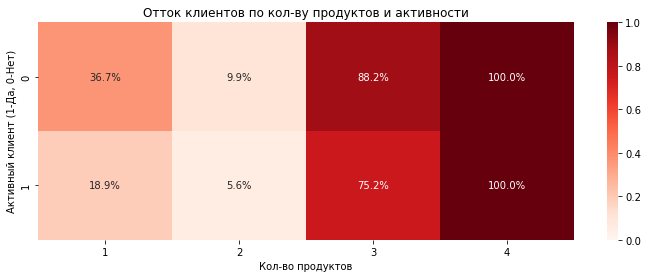

In [50]:
loyalty_products = data.pivot_table(
        index='loyalty',
        columns='products',
        values='churn',
        aggfunc='mean'
    )
plt.figure(figsize=(12, 4))
sns.heatmap(loyalty_products, annot=True, cmap='Reds', vmin=0, vmax=1, fmt='.1%')
plt.title('Отток клиентов по кол-ву продуктов и активности')
plt.xlabel('Кол-во продуктов')
plt.ylabel('Активный клиент (1-Да, 0-Нет)')
plt.show()

Наименьший отток наблюдается у клиентов, оформивших два продукта. Клиенты оформившие 3 и более продукта почти 100% уйдут в отток. 

Активные клиенты менее склоны уходить в отток.

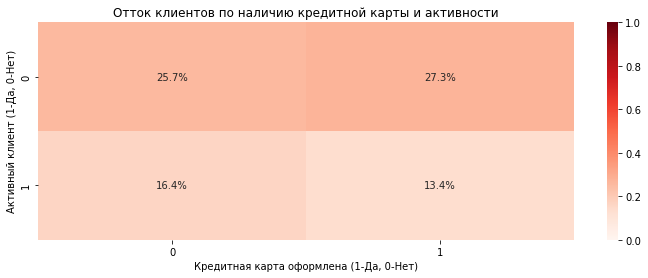

In [51]:
loyalty_cc = data.pivot_table(
        index='loyalty',
        columns='creditcard',
        values='churn',
        aggfunc='mean'
    )
plt.figure(figsize=(12, 4))
sns.heatmap(loyalty_cc, annot=True, cmap='Reds', vmin=0, vmax=1, fmt='.1%')
plt.title('Отток клиентов по наличию кредитной карты и активности')
plt.xlabel('Кредитная карта оформлена (1-Да, 0-Нет)')
plt.ylabel('Активный клиент (1-Да, 0-Нет)')
plt.show()

Как мы уже отпределили, активные клиенты более лояльны к Банку.

При этом наличие кредитной карты не выявляет такую же закономерность. 

Неактивные клиенты с кредитной картой скорее уйдут в отток. Напротив Активные клиенты, скорее уйдут в отток не имея кредитной карты.

**Выводы:**

Доля клиентов попавших в отток 20.37 %

Клиенты среднего возраста (46-55 лет) уходят в отток в половине случаев. Клиенты в возрасте 45-70 лет чаще уходят в отток, чем остаются. 

Пик отока наблюдается в возрасте 45-50 лет.

Клиенты молодого возраста более лояльны. Меньше всего в отток уходят клиенты возрастной категории 18-25 лет (7.53 %). Максимально лояльны клиенты из Ярославля в возрасте 18-25 лет.

В отток склоны уходить женщины из Ростова Великого (37,6 % всех клиентов). Мужчины из Рыбинска и Ярославля более лояльны (в отток уходят чуть более 10% клиентов-мужчин). В целом женщины более склоны уходить, чем оставаться. 

Отток из Ростова Великого более выражен. Отток из Ростова Великого более выражен. Максимальный отток наблюдается среди клиентов 46-55 лет из Ростова Великого.

Клиенты оформившие 3 и более продукта почти 100% уйдут в отток. Наименьший отток наблюдается у клиентов, оформивших два продукта. 

Активные клиенты менее склоны уходить в отток.

Клиент с низким кредитным рейтингом - вероятно уйдет в отток. 

По остальным критериям какие-либо выраженные различия не выявлены.

На основании проведенного анализа, мы можем составить **портрет клиента, который с большей вероятностью уйдет в отток:**

1. С большей вероятностью это будет женщина
2. Возраст 46-55 лет.
3. Клиент, обсуживающийся в Ростове Великом
4. Клиент, оформивший 3 и более продукта
5. Со средним кредитным рейтингом
6. Клиент категории - неактивный

**Портрет клиента, который с большей вероятностью останется:**

1. С большей вероятностью это будет мужчина
2. Возраст 18-25 лет.
3. Клиент, обсуживающийся в Рыбинске и Ярославле
4. Активный клиент, оформивший 2 продукта, один из которых кредитная карта
5. Со средним кредитным рейтингом


    
<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера:</b> Хорошо сформулированные портреты, в которых подробно описаны все необходимые параметры
</div>


## Статистическая проверка гипотез

### Определение критерия статистической проверки и его обоснование.

Для определения статистического теста, необходимо проверить распределены ли данные нормально.

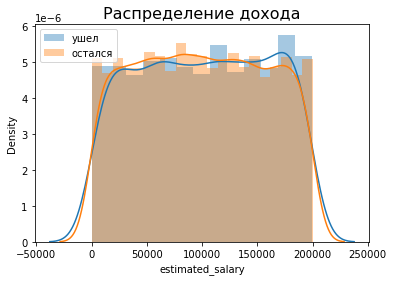

In [52]:
#делаем срезы данных
df_churn_0=data.query("churn==0")
df_churn_1=data.query("churn==1")
#Строим гистрограмму
sns.distplot(df_churn_1['estimated_salary'],label='ушел')
sns.distplot(df_churn_0['estimated_salary'],label='остался')
plt.title('Распределение дохода',fontsize=16)
plt.legend()
plt.show()

In [53]:
print('Дисперсия первой выборки = ', round(np.var(df_churn_0['estimated_salary']),2))
print('Дисперсия второй выборки = ', round(np.var(df_churn_1['estimated_salary']),2))

Дисперсия первой выборки =  3294987575.74
Дисперсия второй выборки =  3352201702.32


С помощью QQ-plot проверим, является ли распределение нормальным.

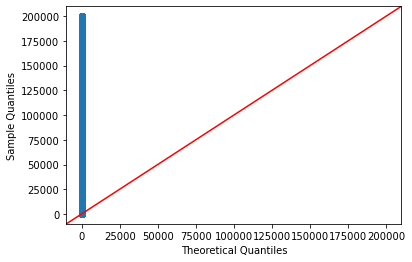

In [54]:
fig = sm.qqplot(data['estimated_salary'], line='45')
plt.show()

Оценим размеры выборок

In [55]:
print('Размер первой выборки = ', len(df_churn_0['estimated_salary']))
print('Размер второй выборки = ', len(df_churn_1['estimated_salary']))

Размер первой выборки =  7963
Размер второй выборки =  2037


Распределение дохода не имеет нормального распределения. Поэтому будем использовать непраматрический тест Манна-Уитни.

Этот метод определяет, достаточно ли мала зона перекрещивающихся значений между двумя рядами (ранжированным рядом значений параметра в первой выборке и таким же во второй выборке). Чем меньше значение критерия, тем вероятнее, что различия между значениями параметра в выборках достоверны.

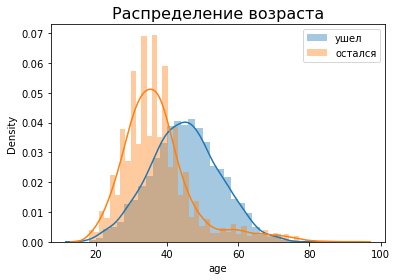

In [56]:
#Строим гистрограмму
sns.distplot(df_churn_1['age'],label='ушел')
sns.distplot(df_churn_0['age'],label='остался')
plt.title('Распределение возраста',fontsize=16)
plt.legend()
plt.show()


In [57]:
print('Дисперсия первой выборки = ', round(np.var(df_churn_0['age']),2))
print('Дисперсия второй выборки = ', round(np.var(df_churn_1['age']),2))

Дисперсия первой выборки =  102.51
Дисперсия второй выборки =  95.24


С помощью QQ-plot проверим, является ли распределение нормальным.

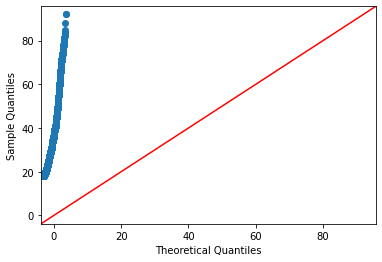

In [58]:
fig = sm.qqplot(data['age'], line='45')
plt.show()

Несмотря на то, что дисперсии выборок похожи, возраст не имеет нормального распределения. Поэтому будем использовать непраматрический тест Манна-Уитни.

### Проверка гипотезы различия дохода между теми клиентами, которые ушли и теми, которые остались. 

Определим **Нулевая гипотеза Н0** - доход ушедших и оставшихся клиентов одинаковый.

**Альтернативная гипотеза Н1** - между доходом ушедших и оставшихся клиентов есть разница.

**Уровень статистической значимости aльфа** установим - 0,05

In [59]:
alpha = .05 #уровень значимости

print('P-value {0:.5f}'.format(st.mannwhitneyu(
    df_churn_0['estimated_salary'], 
    df_churn_1['estimated_salary'])[1]))
print('Относительное различие дохода между группами {0:.4f}'.format(df_churn_1['estimated_salary'].mean()/df_churn_0['estimated_salary'].mean()-1))

if ((st.mannwhitneyu(df_churn_0['estimated_salary'], df_churn_1['estimated_salary'])[1]) < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

P-value 0.22705
Относительное различие дохода между группами 0.0173
Не получилось отвергнуть нулевую гипотезу


В результате теста мы выяснили, что статистически значимых различии величины дохода между группами клиентов ушедших в отток и осташихся нет. 

Относительное различие дохода между группами 1,73 %.


### Проверка гипотезы возраст клиента влияет на отток. 

**Нулевая гипотеза Н0** - возраст ушедших и оставшихся клиентов одинаковый.

**Альтернативная гипотеза Н1** - между возрастом ушедших и оставшихся клиентов есть разница.

**Уровень статистической значимости aльфа** установим - 0,05

In [60]:
alpha = .05 #уровень значимости

print('P-value ', st.mannwhitneyu(
    df_churn_0['age'], 
    df_churn_1['age'])[1])
print('Относительное различие дохода между группами {0:.4f}'.format(df_churn_1['age'].mean()/df_churn_0['age'].mean()-1))

if ((st.mannwhitneyu(df_churn_0['age'], df_churn_1['age'])[1]) < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

P-value  3.2104014319371675e-230
Относительное различие дохода между группами 0.1986
Отвергаем нулевую гипотезу


В результате теста мы выяснили, что есть статистически значимые различия возраста между группами клиентов ушедших в отток и осташихся.

Относительное различие возраста между группами 19,86 %. Клиенты ушедшие в отток старше.

## Общий вывод

В предлагаемом к анализу датафрейме - 10 000 строк с информацией о клиентах регионального Банка. 

В данных было найдено 3 617 пропусков по столбцу 'balance' (36,17 %). Данные пропуски вероятно отражают остатки на дебетовых картах, которые не были заполнены при выгрузке, т.к. технически не отражаются отицательные и нулевые балансы. Считаем целесообразным проработать вопрос корректного отражения данных с разработчиками. 

Дубликаты строк в данных не обнаружены. Все 10 000 клиентов являются уникальными. Для удобства работы названия столбоц были переведены в нижний регистр.

Большая часть клиентов обслуживается в головном офисе Банка в городе Ярославле. В областных городах находится примерно столько же клиентов и они разделены практически поровну.
Клиентов - мужчин на 10 % больше, чем клиентов-женщин.
Больше всего клиентов среднего возраста 26-45 лет. Меньше всего клиентов младшей возрастной группы 18-25 лет. Среди почти всех возрастных групп мужчин больше. Отличается только категория 46-55 лет, где женщин и мужчин поровну.
Доход клиентов возраста 18-25 лет в целом немного выше других групп. Самый низкий доход у клиентов предпенсионного и пенсионного возраста, что в целом ожидаемо. У большего числа клиентов в выборке в собственности более 5 объектов.
У типичного клиента Банка оформлено 1 или 2 продукта, остаток на счете более 100 000 рублей, есть кредитная карта, имеет  средний кредитный рейтинг. 

Выявлен **портрет активного клиента:** Мужчина, в возрасте 26-45 лет, обслуживается в Ярославле и Рыбинске. Имеет 1-2 банковских продукта, кредитную карту, имеет средний кредитный рейтинг. Остаток баланса у такого клиента как правило более 100 000 рублей.

Доля клиентов попавших в отток 20.37 %

На основании проведенного анализа, мы составили **портрет клиента, который с большей вероятностью уйдет в отток:**

1. Женщина, в возрасте 46-55 лет, обсуживающаяся в Ростове Великом.
2. Клиент, оформивший 3 и более продукта
3. Со средним кредитным рейтингом
4. Клиент категории - неактивный

А так же **портрет клиента, который с большей вероятностью останется:**

1. Мужчина в возрасте 18-25 лет, обсуживающийся в Рыбинске и Ярославле
2. Активный клиент, оформивший 2 продукта, один из которых кредитная карта
3. Со средним кредитным рейтингом

В целях проверки гипотез нами были проведены непараметрический статистические тесты Манна-Уитни.

Гипотеза о различии дохода между теми клиентами, которые ушли и теми, которые остались - не подтвердилась.
В результате теста мы выяснили, что статистически значимых различии величины дохода между группами клиентов ушедших в отток и осташихся нет. Относительное различие дохода между группами 1,73 %.

В результате проверки гипотезы о влиянии возраста клиента на отток мы выяснили, что есть статистически значимые различия возраста между группами клиентов ушедших в отток и осташихся. Относительное различие возраста между группами 19,86 %. Клиенты ушедшие в отток старше.

Опираясь на проведенное ислледование оттока клиентов Банка, нами предлагаются следующие **рекомендации:**
1. Самая лояльная группа клиентов к Банку это молодые люди 18-25 лет, отток среди данной категории составляет 7.53 %. Данная категория также обладает чуть болле высокими средними доходами в сравнении с другими. При этом эта возрастная группа и самая малочисленная - всего 611 клиентов (6,11 %). Считаем целесообразным проведение маркетинговых мероприятий по привлечению данной аудитории в Банк на обслуживание.
2. Самый большой отток наблюдается  у возрастной группы  46-55 лет. Наблюдается массовый уход с обслуживания в возрасте 45-70 лет. Это клиенты пенсионного и предпенсионного возраста. Необходимо провезти анализ банков-конкурентов в части льгот на обслуживание и акций для пенсионеров. Стоит расмотреть вопрос о создании линейки вкладов "пенсионный" с начислением повышенного процента.
3. По географическому признаку, наблюдается выраженный отток из города Ростов Великий. Целесообразно проверить качество обслуживания в этом городе. А так же провести анализ банков-конкурентов даного города, возможно какие-то банки предоставляют жителям более интересные условия обслуживания.
4. Сделать рассылку клиентам категории активный с допустимым кредитным рейтингом, у которых не оформлена кредитная карта, с предложением ее оформить на льготных (конкурентных) условиях, например: с бесплатным обслуживанием, наличием кэшбэка.
5. Необходимо провезти анализ продуктовой линейки Банка, с целью выяснить что это за 3 и 4 продукт, которые приводят к 100 % оттоку.


Презентация: <ссылка на облачное хранилище с презентацией>
https://drive.google.com/file/d/1sxnY1dsaSMzxime2-2vdIz54CJcMbSJ1/view?usp=sharing

Дашборд: <ссылка на дашборд в Tableau>

https://public.tableau.com/views/_16784597152110/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link